# Testing out the functionality of Max-Norm regularization

## Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from functools import partial

## Loading dataset

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255

In [4]:
pixel_mean = x_train.mean(axis = 0, keepdims = True)
pixel_std = x_train.std(axis = 0, keepdims = True)
x_train_scaled = (x_train - pixel_mean) / pixel_std
x_valid_scaled = (x_valid - pixel_mean) / pixel_std
x_test_scaled = (x_test - pixel_mean) / pixel_std

## Building, training and evaluating the model

In [6]:
max_norm_dense = partial(keras.layers.Dense, activation = keras.activations.selu, kernel_initializer = keras.initializers.lecun_normal, 
                         kernel_constraint = keras.constraints.max_norm(1.))

In [14]:
keras.backend.clear_session()

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(max_norm_dense(300))
model.add(max_norm_dense(100))
model.add(max_norm_dense(10, activation = keras.activations.softmax))

In [16]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(), metrics = 'accuracy')

In [17]:
history = model.fit(x_train_scaled, y_train, epochs = 5, validation_data = (x_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4527 - accuracy: 0.8371 - val_loss: 0.3982 - val_accuracy: 0.8560
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3508 - accuracy: 0.8708 - val_loss: 0.3410 - val_accuracy: 0.8768
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3284 - accuracy: 0.8796 - val_loss: 0.3422 - val_accuracy: 0.8736
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3188 - accuracy: 0.8799 - val_loss: 0.3663 - val_accuracy: 0.8688
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3100 - accuracy: 0.8847 - val_loss: 0.3420 - val_accuracy: 0.8824


In [18]:
df_metrics = pd.DataFrame(history.history)

<AxesSubplot:>

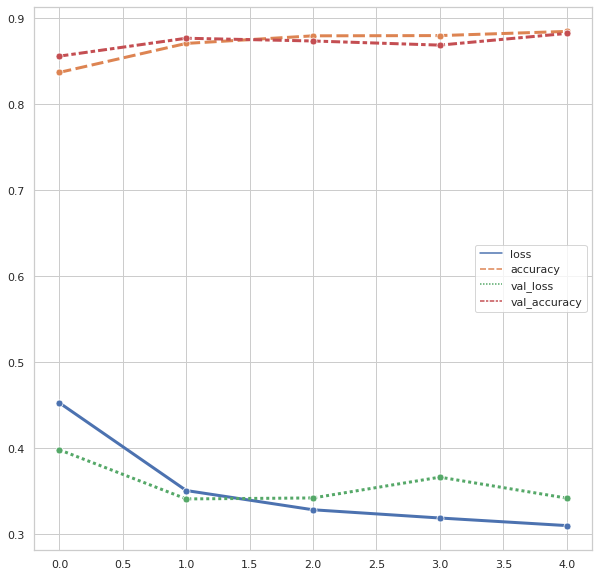

In [19]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 10))
sns.lineplot(data = df_metrics, linewidth = 3, marker = 'o', markersize = 7)

In [20]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 987us/step - loss: 0.3697 - accuracy: 0.8685


[0.36971959471702576, 0.8684999942779541]